In [1]:
import os
from pathlib import Path
import pickle
from time import time
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

from catch_converter.parse_contours import parse_cvi42ws
import CATCH_utils
from Mini_LL import *

In [2]:
# load cases
bp = '/Users/dietrichhadler/Desktop/Daten/test/data/segm1'
case_paths = [os.path.join(bp,p) for p in os.listdir(bp) if p.endswith('.pickle')]
cases1 = [pickle.load(open(p, 'rb')) for p in case_paths]
bp = '/Users/dietrichhadler/Desktop/Daten/test/data/segm2'
case_paths = [os.path.join(bp,p) for p in os.listdir(bp) if p.endswith('.pickle')]
cases2 = [pickle.load(open(p, 'rb')) for p in case_paths]
cases1 = sorted(cases1, key=lambda c: c.studyinstanceuid)
cases2 = sorted(cases2, key=lambda c: c.studyinstanceuid)

crs1 = [(cr.name, cr.get_cr()) for c in cases1 for cr in c.crs]
crs2 = [(cr.name, cr.get_cr()) for c in cases2 for cr in c.crs]
print(crs1)
print(crs2)

[('LVESV', 103.49857177734376), ('LVEDV', 184.06505126953124), ('RVESV', 0.0), ('RVEDV', 0.0), ('LVESV', 85.64158879876815), ('LVEDV', 151.91115689103995), ('RVESV', 0.0), ('RVEDV', 0.0), ('LVESV', 64.91293540545468), ('LVEDV', 167.98959989979244), ('RVESV', 0.0), ('RVEDV', 0.0)]
[('LVESV', 103.24478759765626), ('LVEDV', 179.65843505859374), ('RVESV', 0.0), ('RVEDV', 0.0), ('LVESV', 92.4678097364143), ('LVEDV', 157.89122290796485), ('RVESV', 0.0), ('RVEDV', 0.0), ('LVESV', 78.00391600297218), ('LVEDV', 183.68545235451745), ('RVESV', 0.0), ('RVEDV', 0.0)]


In [3]:
# get metrics table
case_comps = [Case_Comparison(cases1[i], cases2[i]) for i in range(len(cases1))]
tables = [SAX_CINE_analyzer(cc).get_case_contour_comparison_pandas_dataframe(fixed_phase_first_reader=False) for cc in case_comps]
master_table = pd.concat([t for t in tables])
display(master_table)

,case,reader1,reader2,sop1,sop2,category,slice,max_slices,depth_perc,phase1,phase2,contour name,DSC,HD,ml diff,abs ml diff,position1,position2,has_contour1,has_contour2
row_0000,178-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVES,0,17,0.000000,10,9,lv_endo,100.000000,0.000000,0.000000,0.000000,outside,outside,False,False
row_0001,178-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVES,1,17,0.058824,10,9,lv_endo,100.000000,0.000000,0.000000,0.000000,outside,outside,False,False
row_0002,178-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVES,2,17,0.117647,10,9,lv_endo,93.741857,2.627975,1.063394,1.063394,basal,basal,True,True
row_0003,178-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVES,3,17,0.176471,10,9,lv_endo,93.928337,1.767767,0.085556,0.085556,midv,midv,True,True
row_0004,178-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVES,4,17,0.235294,10,9,lv_endo,96.190906,1.237437,-0.088055,0.088055,midv,midv,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
row_0139,180-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVED,13,18,0.722222,29,28,lv_myo,82.129637,2.015564,1.364987,1.364987,midv,midv,True,True
row_0140,180-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVED,14,18,0.777778,29,28,lv_myo,72.215297,2.236068,-0.139669,0.139669,midv,midv,True,True
row_0141,180-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVED,15,18,0.833333,29,28,lv_myo,34.695157,4.650269,-1.170907,1.170907,apical,apical,True,True
row_0142,180-lvma,segm1,segm2,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,1.2.276.0.7230010.3.1.4.2984217738.4584.158694...,SAX LVED,16,18,0.888889,29,28,lv_myo,100.000000,0.000000,0.000000,0.000000,outside,outside,False,False


Params:  [[ 0.08329143  0.00934478 -0.00841398 -0.99644589]
 [-0.89293297  0.39938979  0.19467116 -0.07253722]]


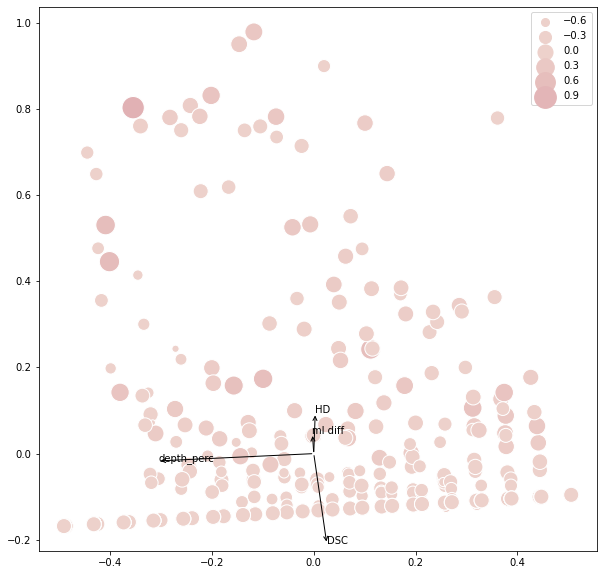

In [7]:
clustered_table = master_table.copy()

# add clusters to table
data = clustered_table[['DSC', 'HD', 'ml diff', 'depth_perc']].values
data = data / np.max(np.abs(data), axis=0)
clusters = KMeans(n_clusters=5).fit_predict(data)
clustered_table['Clusters'] = clusters

features = ['DSC', 'HD', 'ml diff', 'depth_perc']
pca = PCA(n_components=2)
components = pca.fit_transform(data)
print('Params: ', pca.components_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(
    x=components[:,0], y=components[:,1], hue=data[:,2], size=data[:,2],
    sizes=(20, 500), hue_norm=(0, 7), ax=ax, #legend="full"
)

for i in range(len(loadings)):
    ax.annotate('', xy=(loadings[i,0], loadings[i,1]), 
                xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    ax.text(loadings[i,0], loadings[i,1], features[i], transform=ax.transData)
plt.show()



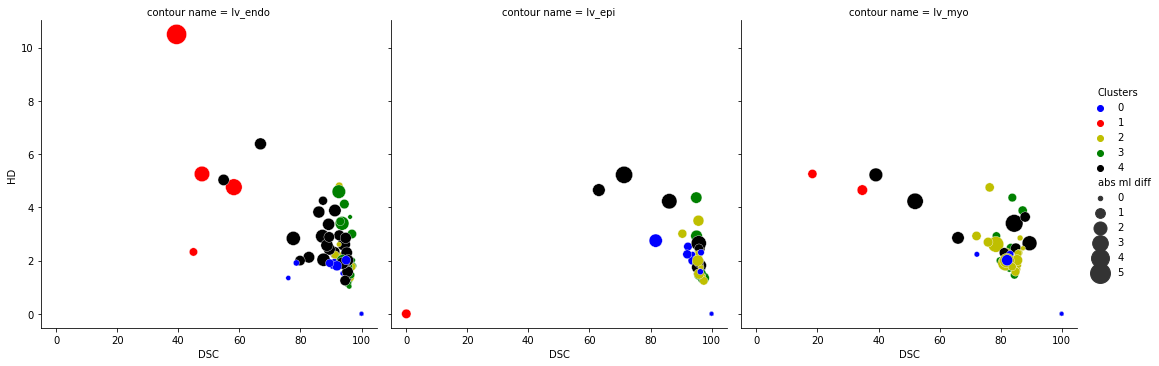

In [9]:
presentable_table = clustered_table[clustered_table['contour name']!='lv_pamu']
sns.relplot(
    data=presentable_table,
    x='DSC', y='HD', hue='Clusters', size='abs ml diff',
    col='contour name', palette=['b', 'r', 'y', 'g', 'k'], #row='position1', 
    kind="scatter",
    sizes=(20, 400)
)

In [10]:
clustered_table = master_table[master_table['DSC']<85].copy()

# add clusters to table
data = clustered_table[['DSC', 'HD', 'ml diff', 'depth_perc']].values
data = data / np.max(np.abs(data), axis=0)
data[:,2] *= 2
clusters = KMeans(n_clusters=6).fit_predict(data)
clustered_table['Clusters'] = clusters

print(len(master_table), len(clustered_table))
print(clustered_table.columns)

416 92
Index(['case', 'reader1', 'reader2', 'sop1', 'sop2', 'category', 'slice',
       'max_slices', 'depth_perc', 'phase1', 'phase2', 'contour name', 'DSC',
       'HD', 'ml diff', 'abs ml diff', 'position1', 'position2',
       'has_contour1', 'has_contour2', 'Clusters'],
      dtype='object')


# Only Consider Segmentation Mistakes (= DSC<0.8)

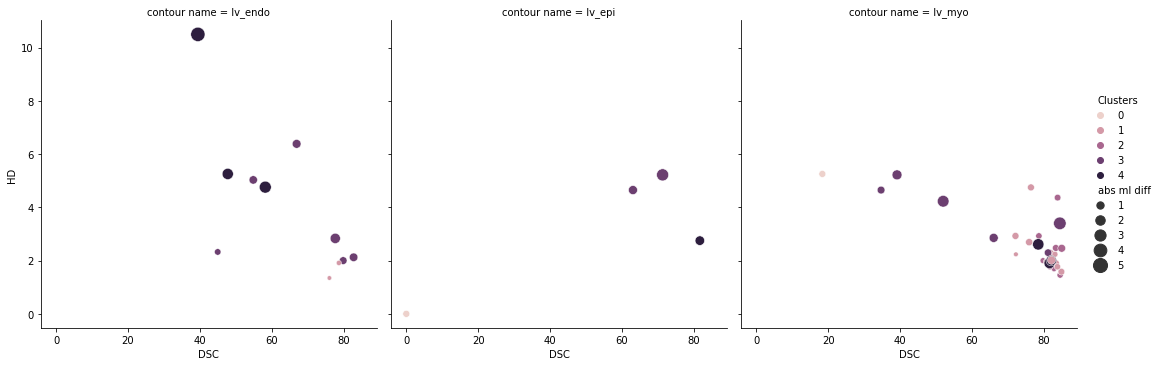

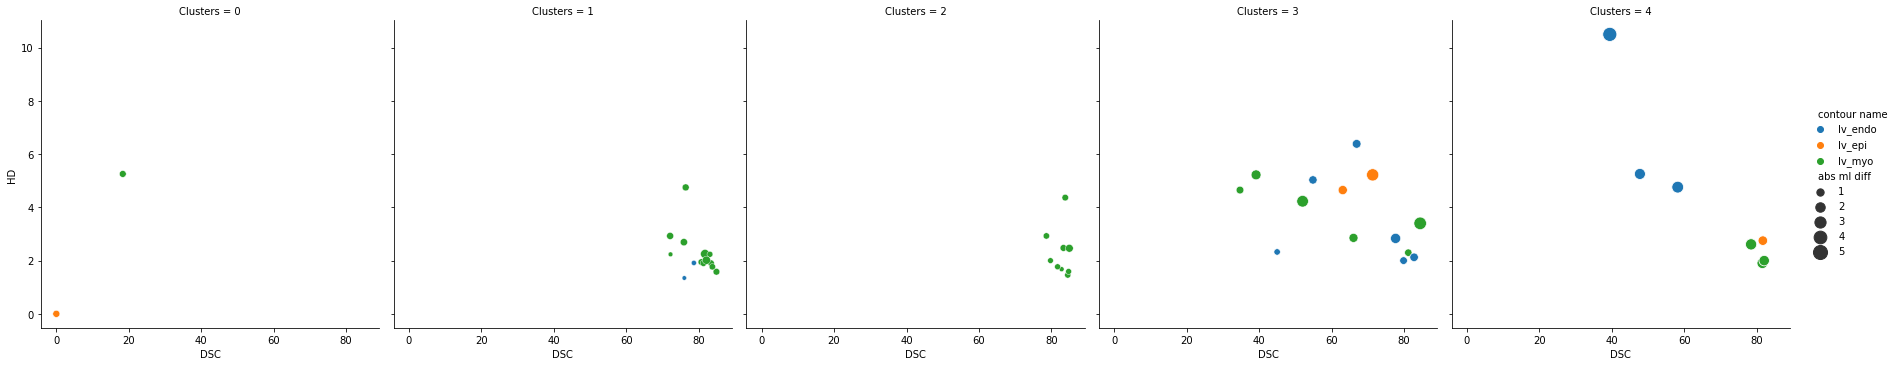

In [11]:
presentable_table = clustered_table[clustered_table['contour name']!='lv_pamu']
sns.relplot(
    data=presentable_table,
    x='DSC', y='HD', hue='Clusters', size='abs ml diff',
    col='contour name', #row='position1', 
    kind="scatter",
    sizes=(20, 200)
)
presentable_table = clustered_table[clustered_table['contour name']!='lv_pamu']
sns.relplot(
    data=presentable_table,
    x='DSC', y='HD', hue='contour name', size='abs ml diff',
    col='Clusters', #row='position1', 
    kind="scatter",
    sizes=(20, 200)
)

In [12]:
print("Columns: ", master_table.columns)
clustered_table = master_table.copy()

# add clusters to table
data = clustered_table[['DSC', 'HD', 'ml diff', 'depth_perc']].values
data = data / np.max(np.abs(data), axis=0)
clusters = KMeans(n_clusters=6).fit_predict(data)
clustered_table['Clusters'] = clusters

print(clustered_table.columns)

Columns:  Index(['case', 'reader1', 'reader2', 'sop1', 'sop2', 'category', 'slice',
       'max_slices', 'depth_perc', 'phase1', 'phase2', 'contour name', 'DSC',
       'HD', 'ml diff', 'abs ml diff', 'position1', 'position2',
       'has_contour1', 'has_contour2'],
      dtype='object')
Index(['case', 'reader1', 'reader2', 'sop1', 'sop2', 'category', 'slice',
       'max_slices', 'depth_perc', 'phase1', 'phase2', 'contour name', 'DSC',
       'HD', 'ml diff', 'abs ml diff', 'position1', 'position2',
       'has_contour1', 'has_contour2', 'Clusters'],
      dtype='object')


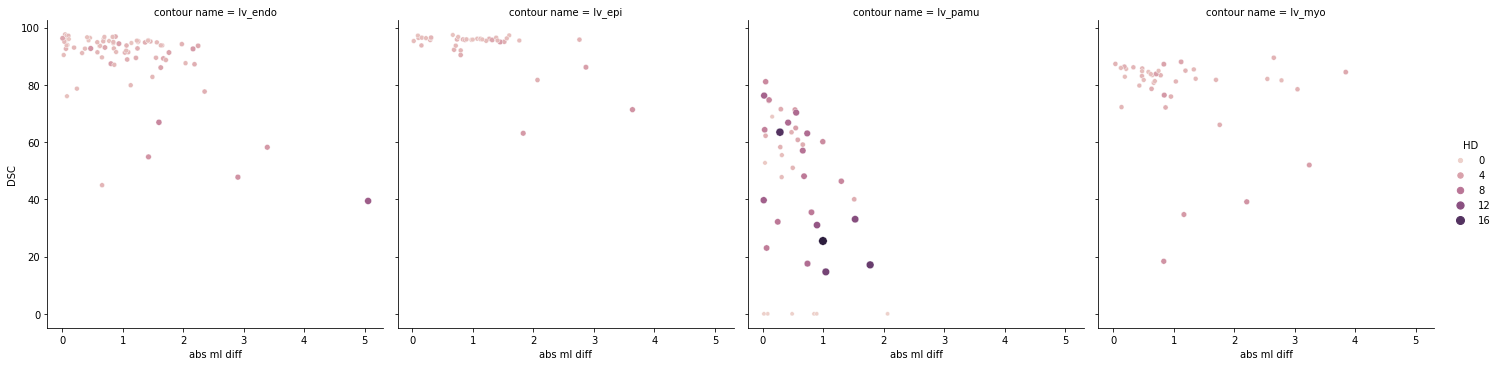

In [13]:
sns.relplot(
    data=master_table[master_table['position1']!='outside'], 
    x="abs ml diff", y="DSC", hue="HD", size="HD",
    col="contour name", kind="scatter"
)

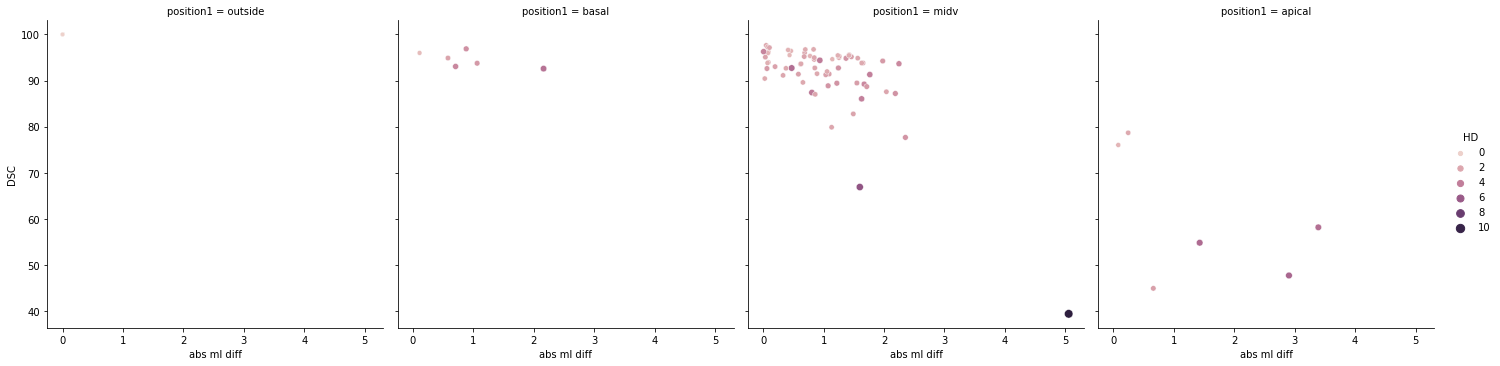

In [14]:
sns.relplot(
    data=master_table[master_table['contour name']=='lv_endo'], 
    x="abs ml diff", y="DSC", hue="HD", size="HD",
    col="position1", kind="scatter"
)

Params:  [[-0.48147832  0.30620446  0.81108447  0.12868352]
 [-0.35305734  0.18285021 -0.40893281  0.82139532]]


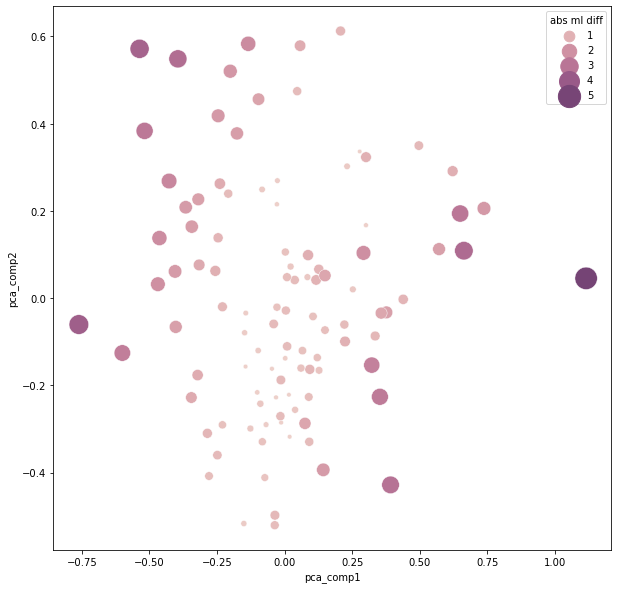

In [15]:
clustered_table = master_table.copy()
clustered_table = clustered_table[clustered_table['DSC']>0]
clustered_table = clustered_table[clustered_table['DSC']<90]
clustered_table = clustered_table[['DSC', 'HD', 'ml diff', 'abs ml diff', 'depth_perc']]

#clustered_table = clustered_table[['DSC', 'HD', 'ml diff', 'abs ml diff', 'depth_perc']][clustered_table['contour name']=='lv_myo']


data = clustered_table[['DSC', 'HD', 'ml diff', 'depth_perc']].values
data = data / np.max(np.abs(data), axis=0)

# pca for main component analysis
pca = PCA(n_components=2)
components = pca.fit_transform(data)

clustered_table['pca_comp1'] = components[:,0]
clustered_table['pca_comp2'] = components[:,1]

print('Params: ', pca.components_)
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(
    data=clustered_table, x='pca_comp1', y='pca_comp2', hue='abs ml diff', 
    size='abs ml diff', sizes=(20, 500), hue_norm=(0, 7), ax=ax, #legend="full"
)
plt.show()

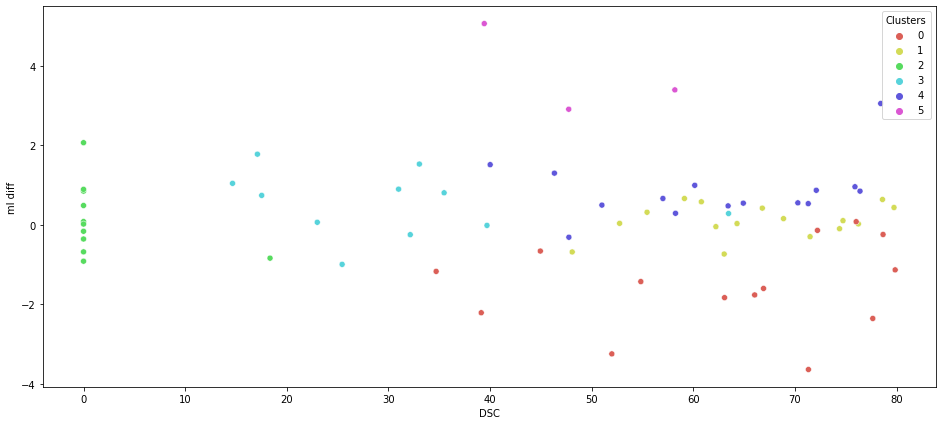

In [16]:
clustered_table = master_table.copy()
clustered_table = clustered_table[['DSC', 'HD', 'ml diff', 'abs ml diff', 'depth_perc']][master_table['DSC']<80]

data = clustered_table[['DSC', 'HD', 'ml diff', 'depth_perc']].values
data = data / np.max(np.abs(data), axis=0)
clusters = KMeans(n_clusters=6).fit_predict(data)
clustered_table['Clusters'] = clusters

plt.figure(figsize=(16,7))
sns.scatterplot(data=clustered_table, x='DSC', y='ml diff', hue='Clusters',
                palette=sns.color_palette("hls",6), legend="full")
plt.show()

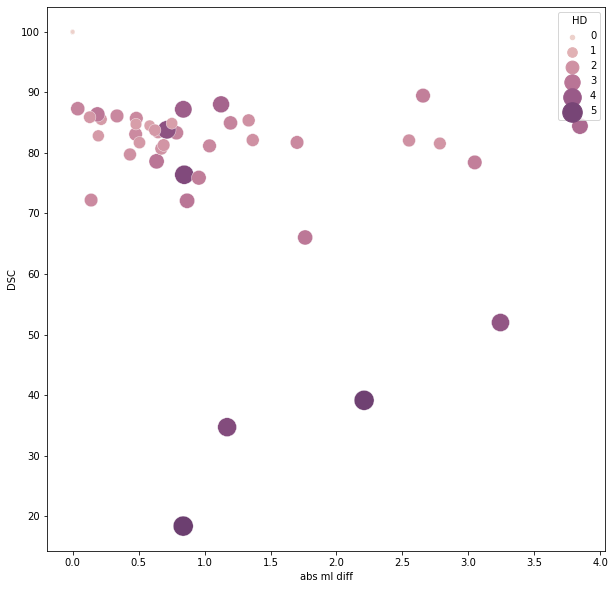

In [17]:
data = master_table.copy()
data = data[['DSC', 'HD', 'ml diff', 'abs ml diff', 'depth_perc', 'contour name']][master_table['DSC']<80]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(
    data=master_table[master_table['contour name']=='lv_myo'], x="abs ml diff", y="DSC", hue="HD", size="HD",
    sizes=(20, 400), hue_norm=(0, 7), ax=ax, #legend="full"
)
plt.show()

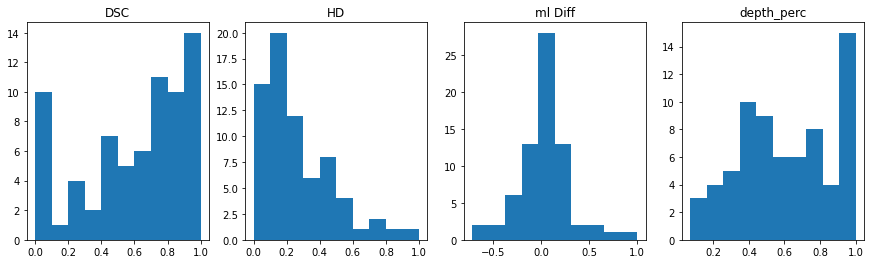

In [18]:
data = master_table[['DSC', 'HD', 'ml diff', 'depth_perc']][master_table['DSC']<80].values
data = data / np.max(np.abs(data), axis=0)
fig, axes = plt.subplots(1,4,figsize=(15,4))
for i in range(4): 
    axes[i].hist(data[:,i]); axes[i].set_title(['DSC', 'HD', 'ml Diff', 'depth_perc'][i])
plt.show()